# Particle Detector

In this exercise I simulate the cosmic ray experiment shown below.

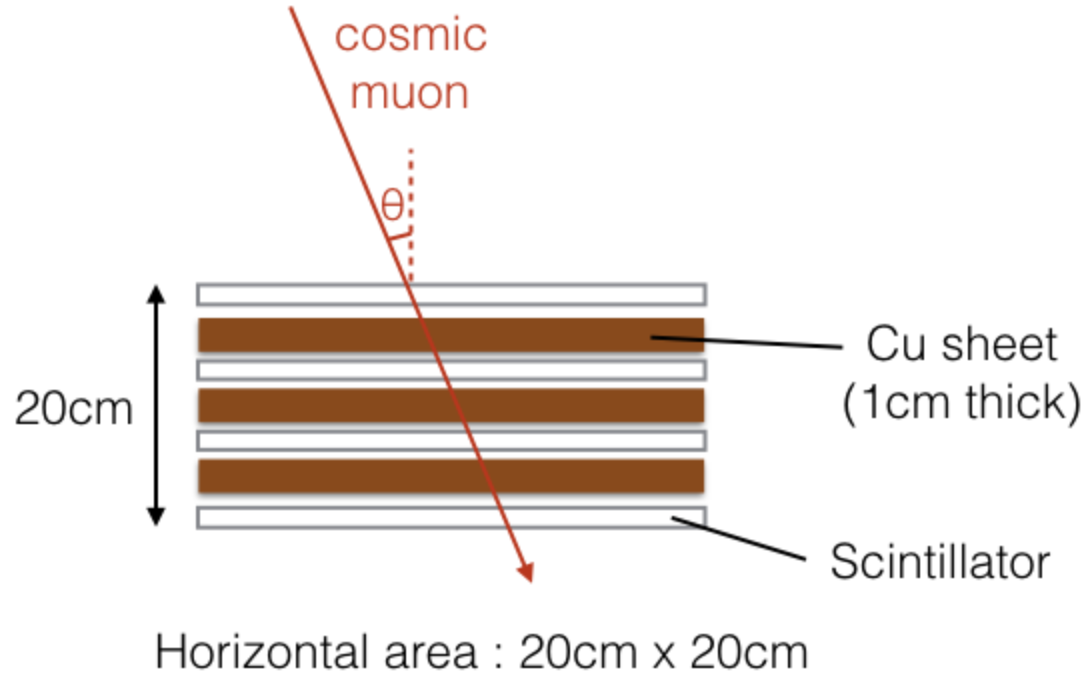

The experiment comprises 4 detection layers, each of which will produce a signal when a particle traverses the detector, separated by three sheets of copper, which will stop a fraction of muons, allowing a measurement of the muon lifetime to be made.

The detector has the following parameters :
* the efficiency of each of the 4 layers to detect a muon or electron is, from top to bottom : 55%, 60%, 85%, 50%.
* the probability of a cosmic ray muon to stop in 1cm of copper is $5\times10^{-3}$.
* electrons are emitted isotropically during decay of a stopped muon.
* decay electrons have energy 50 MeV and maximum path length of 1.8cm in copper.

In order to model the initial distribution of cosmic rays, I assume that the anuglar distribution is proportional to ${\rm cos}^2(\theta)$, for zenith angle $\theta$. The overall normaliation is taken from the intensity of _vertical_ muons and is set to 70 $m^{-2}s^{-1}sr^{-1}$.


### a)

The code below has been designed such that all operations are broken down into individual functions. Throughout the code, a varied an extensive use of dictionaries has been employed in order to further optimise the programme.

The task each function performs has been described in the comments embedded  within the code. The style of commenting follows the current convention in order to make it as clear as possible. I will therefore focus on describing the interaction between each function, in order to avoid needless repetition of information.

The functions responsible for simulating the scintillator experiment and pulling together the functionality of all other functions are named Sim_stats() & Sim_plot(). Sim_plot() provides a three dimensional visual representation of the scintillator experiment which serves to verify the success of the code in modelling the scintillator experiment. Sim_plot() performs timed runs of the scintillator experiment and extracts statistical information.

A breakdown of the algorithm employed by the program goes as follows. Muon events are created by calling functions which provide an initial location, located on a plane above the scintillator experiment and a trajectory in terms of polar co-ordinates. A series of checks are then performed at each of the four scintillator layers. These checks measure the number of muons which, either go onto the next layer or exit the side of the experiment, get detected or pass through undetected, or get absorbed and produce an electron. 

Of those which produce an electron, the initial trajectory of the electron is generated by using sphere point picking methods. This method produces a vector where each x,y,z element is randomly generated from a gaussian distribution. The function responsible for determining whether an electron is detected in an adjacent layer, uses a series of sub functions which operate by the following procedure. An initial location of the electron within the copper layer is calculated and then, in conjunction with the direction vector of the electron, it's position after having travelled the maximum distance it can go before getting trapped (1.8cm) is determined. A check is then made to determine if the electron is still within a copper layer, if so, then it will inevitably become trapped and so no further checks are performed. If however the electron has escaped, then a further function determines whether the electron collides with a detector plate either above or below the copper plate, depending on the trajectory of the electron. Each sub function relies upon the mathematical geometry of the situation which allows for efficient, analytic lines of code, able to provide precise results without the need for any numerical techniques.



In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def x(n):
    """Produces an even distribution of random numbers between zero and 2e-2.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""
    s = 20e-2
    return s*np.random.random(n)

def y(n):
    """Produces an even distribution of random numbers between zero and 2e-2.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""
    s = 20e-2
    return s*np.random.random(n)

def phi(n):
    """Produces an even distribution of random numbers between zero & two pi.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""

    return 2*np.pi*np.random.random(n)

def theta(n):
    """Produces a single random number between zero and pi/2, with a cos^2 distribution.
    Inputs: The number one.
    Returns: The value of a single random number."""
    d = 2/np.pi
    b = 1/np.pi
    m = d/b
    theta_ = []
    def p(x):
        return d*(np.cos(x))**2
    while len(theta_)<n:    
        z = np.random.uniform(0, np.pi/2)
        u = np.random.uniform(0, 1)
        if u <= (p(z))/(m*b):
            theta_.append(z)
    return theta_

def muon(n):
    """ Generates a muon
    Inputs: The number of muons you wish to create
    Returns: A dictionary containing the initial position and trajectory of the muon
    """
    x_0 = x(n)
    y_0 = y(n)
    thetalist = theta(n)    
    philist = phi(n)
    muon = { 'x': x_0, 'y': y_0, 'theta': thetalist, 'phi': philist}
    return muon

def mu_loc(x_0,y_0,thetalist,philist):
    """Determines the position of the muon on the detector plate
    Inputs: x_0,y_0; the x,y position of the muon on the detector above,
    thetalist,philist; the trajectory of the muon.
    Returns: A dictionary containing the x,y position of the muon on the detector 
    below."""
    l = 20e-2
    h = l/3
    x = x_0 + h*np.tan(thetalist)*np.cos(philist)
    y = y_0 + h*np.tan(thetalist)*np.sin(philist)
    loc_ = {'x': x, 'y': y}
    return loc_

def Electron(n):
    """Determines the direction vector of the electron with path length 1.8cm
    Inputs: The number of electrons you wish to produce
    Returns: A dictionary containing the x,y,z co-ordinates"""
    l = 1.8e-2
    vec = np.random.randn(3,n)
    vec /= np.linalg.norm(vec, axis=0)
    electron_ = [l*vec]
    direction_vec = {'x': electron_[0][0], 'y': electron_[0][1], 'z': electron_[0][2]}
    return direction_vec

def Electron_sim(n):
    """A version of the function Electron(n) designed to give a graphical plot.
    Inputs: The number of electrons you wish to produce
    Returns: The x,y,z co-ordinates of the electron"""

    l = 2
    vec = np.random.randn(3,n)
    vec /= np.linalg.norm(vec, axis=0)
    electron_ = [l*vec]
    x = electron_[0][0]
    y = electron_[0][1]
    z = electron_[0][2]
    return x,y,z  

def Electron_origin(x_0,y_0,thetalist,philist):
    """Determines the initial position of the electron.
    Inputs: The x,y position of the muon on the detector above the Cu layer
     and theta & phi (the trajectory of the muon).
    Returns: A dictionary containing the x,y location of the electron in the 
    z-axis centre of the Cu layer.
    """
    d = 0.5e-2
    x = x_0 + d*np.tan(thetalist)*np.cos(philist)
    y = y_0 + d*np.tan(thetalist)*np.sin(philist)
    origin_ = {'x': x, 'y': y}
    return origin_

def Electron_position(x_0,x_1,y_0,y_1,z_1):
    """Determines the position of the electron after it has travelled the maximum
    distance is can before it gets trapped.
    Inputs: The initial position and direction vector with path length 1.8cm
    Returns: A dictionary containing the x,y,z co-odinates of the electron"""
    x = x_0 + x_1
    y = y_0 + y_1
    z = z_1
    position_ = {'x': x, 'y': y, 'z': z}
    return position_

def Electron_final(d,x,y,z):
    """Determines the final position of an electron which has escaped the Cu layer.
    Inputs: d; the z-distance to the detector plate. x,y ; the x,y co-ordinates
    of the electron position. z; the z co-ordinate of the initial electron vector
    Returns: A dictionary containing the x,y location of the escaped electron on the 
    adjacent detector plate"""
    p = d/z
    final_ = {'x': p*x, 'y': p*y}
    return final_     


def Plotter(p,x,y,z):
    """Plots the locations of the muons as they either pass through or are 
    detected by a detector.
    Inputs: p; the probability of detection at a given detector, x,y,z; the
    location of the muon within the scintilator
    Returns: scatter plots of the muon locations and colours indicating whether
    they have been detected or not."""
    if np.random.uniform(0, 1) < p :
        ax.scatter(x ,y ,z, c = 'G', marker='o')
    else:
        ax.scatter(x ,y ,z, c = 'B', marker='o')
    return  


def Sim_stats(n):   
    """Generates a statistical simulation of the scintilator experiment.
    Inputs: The number of 10's time intervals you wish to perform the experiment for.
    Returns: A dictionary containing a set of statisticl measurements taken from the 
    experiment."""
    I = 136     
    l = 20e-2
    h = l/3
    detections_0, detections_1, detections_2, detections_3, detections_elec_total, elec_total = ([] for i in range(6))
    events_0, events_1, events_2, events_3 = ([] for i in range(4))
    p_s = 5e-3  #Probability of stopping a muon
    p_d_ = { 'P_0': 0.55, 'P_1': 0.6, 'P_2': 0.85, 'P_3': 0.5} #Probability of detecting a muon
    for _ in range(I*n):  #Generates n*I number of muons 
        muon_ = muon(1)     #Creates a muon on the plane above the detector
        detections_0.append(Checker(p_d_['P_0'])) #Checks to see if the muon is detected
        events_0.append(1)
        if np.random.uniform(0, 1) > p_s :  #Checks to see if the muon is stopped
            mu_loc_1_ = mu_loc(muon_['x'], muon_['y'],muon_['theta'], muon_['phi']) #Determines the location of the muon on the detector
            if 0  <= mu_loc_1_['x'] < l and 0  <= mu_loc_1_['y'] < l : #Checks to see if the muon hasn't left the scintilator
                detections_1.append(Checker(p_d_['P_1'])) #Performs all of the above checks on the lower levels.
                events_1.append(1)
                if np.random.uniform(0, 1) > p_s :
                    mu_loc_2_ = mu_loc(mu_loc_1_['x'],mu_loc_1_['y'],muon_['theta'], muon_['phi'])
                    if 0  <=mu_loc_2_['x'] < l and 0  <= mu_loc_2_['y'] < l :
                        detections_2.append(Checker(p_d_['P_2'])) 
                        events_2.append(1)
                        if np.random.uniform(0, 1) > p_s :
                            mu_loc_3_ = mu_loc(mu_loc_2_['x'],mu_loc_2_['y'],muon_['theta'], muon_['phi'])
                            if 0  <= mu_loc_3_['x'] < l and 0  <= mu_loc_3_['y'] < l :
                                detections_3.append(Checker(p_d_['P_3'])) 
                                events_3.append(1)                                 
                        else:
                            elec_total.append(1)
                            detections_elec_total.append(Electron_detection(mu_loc_2_['x'],\
                            mu_loc_2_['y'],h,muon_['theta'], muon_['phi'])) 
                else:
                    elec_total.append(1)
                    detections_elec_total.append(Electron_detection(mu_loc_1_['x'],\
                    mu_loc_1_['y'],2*h,muon_['theta'], muon_['phi'])) 
        else:
            elec_total.append(1)
            detections_elec_total.append(Electron_detection(muon_['x'], muon_['y'],l,muon_['theta'], muon_['phi']))
        ax.plot(x_,y_,z_, color='k')        
    stats_ = {'Detections at 0': sum(detections_0),'Events at 0': sum(events_0),\
              'Detections at 1': sum(detections_1),'Events at 1': sum(events_1),\
              'Detections at 2': sum(detections_2),'Events at 2': sum(events_2),\
              'Detections at 3': sum(detections_3),'Events at 3': sum(events_3),\
              'Total elec detects': sum(detections_elec_total),'Total elecs produced': sum(elec_total)}   
    return stats_

def Sim_plot(n):
    """Generates a 3-D visual simulation of the scintilator experiment
    Inputs: The number of muons you wish to create
    Returns: A 3-D model of the experiment"""
    l = 20e-2
    h = l/3
    p_s = 1e-1
    p_d_ = { 'P_0': 0.55, 'P_1': 0.6, 'P_2': 0.85, 'P_3': 0.5} 
    for _ in range(n):
        x_,y_,z_ = [],[],[]
        muon_ = muon(1)
        if np.random.uniform(0, 1) > p_s :
            Plotter(p_d_['P_0'],muon_['x'], muon_['y'],l)
            x_.append(muon_['x'])
            y_.append(muon_['y']) 
            z_.append(l)
            mu_loc_1_ = mu_loc(muon_['x'], muon_['y'],muon_['theta'], muon_['phi'])
            if 0  <= mu_loc_1_['x'] < l and 0  <= mu_loc_1_['y'] < l :
                if np.random.uniform(0, 1) > p_s :
                    Plotter(p_d_['P_1'],mu_loc_1_['x'], mu_loc_1_['y'],2*h)
                    x_.append(mu_loc_1_['x'])
                    y_.append(mu_loc_1_['y']) 
                    z_.append(2*h)                        
                    mu_loc_2_ = mu_loc(mu_loc_1_['x'],mu_loc_1_['y'],muon_['theta'], muon_['phi'])
                    if 0  <=mu_loc_2_['x'] < l and 0  <= mu_loc_2_['y'] < l :
                        if np.random.uniform(0, 1) > p_s :
                            Plotter(p_d_['P_2'],mu_loc_2_['x'], mu_loc_2_['y'],h)
                            x_.append(mu_loc_2_['x'])
                            y_.append(mu_loc_2_['y']) 
                            z_.append(h)                        
                            mu_loc_3_ = mu_loc(mu_loc_2_['x'],mu_loc_2_['y'],muon_['theta'], muon_['phi'])
                            if 0  <= mu_loc_3_['x'] < l and 0  <= mu_loc_3_['y'] < l :
                                Plotter(p_d_['P_3'],mu_loc_3_['x'], mu_loc_3_['y'],0) 
                                x_.append(mu_loc_3_['x'])
                                y_.append(mu_loc_3_['y']) 
                                z_.append(0)                                                        
                        else:
                            ax.scatter(mu_loc_2_['x'],mu_loc_2_['y'] ,h, c = 'R', marker='x')
                            x_.append(mu_loc_2_['x'])
                            y_.append(mu_loc_2_['y']) 
                            z_.append(h)                                                                       
                else:
                    ax.scatter(mu_loc_1_['x'],mu_loc_1_['y'] ,2*h, c = 'R', marker='x')
                    x_.append(mu_loc_1_['x'])
                    y_.append(mu_loc_1_['y']) 
                    z_.append(2*h)                                            
        else:
            ax.scatter(muon_['x'] ,muon_['y'] ,l, c = 'R', marker='x')
            x_.append(muon_['x'])
            y_.append(muon_['y']) 
            z_.append(l)
        ax.plot(x_,y_,z_, color='k')        
    return 







### b)

The plots below serve to validate the success of each programme element by providing visual conformity to the known behaviours of each subsystem. 

Figure 1 provides verification of the precision of the simulation algorithm, which models the behaviour of the scintillator when exposed to muon events. The trajectories of the muons as they pass through each layer, triggering either detection (green), pass (blue) or electron (red cross) events is clearly displayed.

Figure 2 displays the success of the sphere point picking method described above, in generating an even distribution of electron vector trajectories. 

Figure 3 displays the pdf's of the x & y distributions which are normalised over a range in line with the dimensions of the plane above the scintillator; where the muons are initially generated.

Figures 4 & 5 display the pdf's of the $\phi$ & $\theta$ distributions which follow a polar trajectory. Where $\phi$ is evenly distributed around zero to $2\pi$ and theta follows the $cos^{2}$ distribution required.




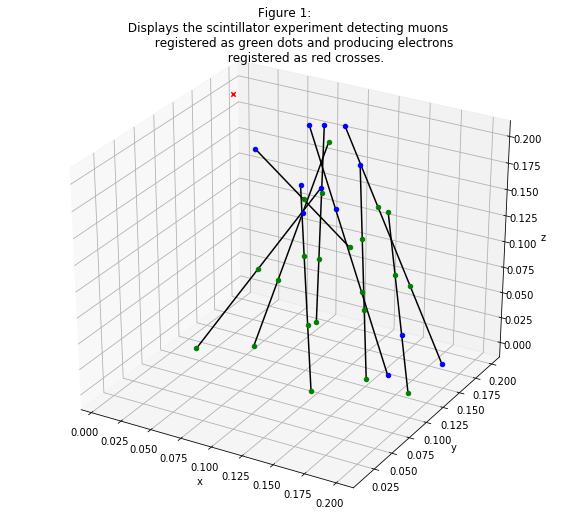

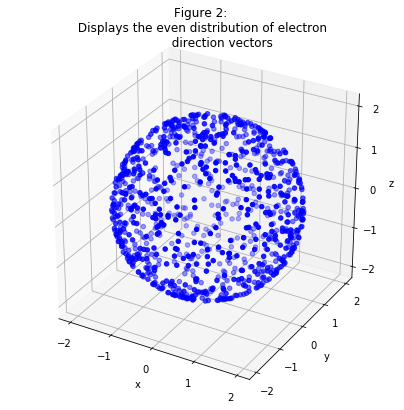

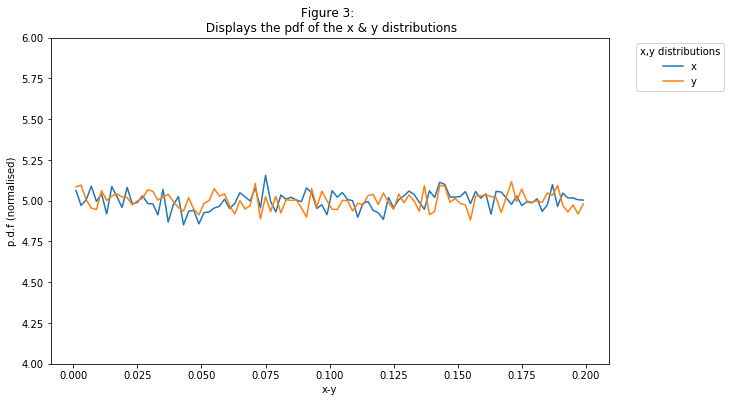

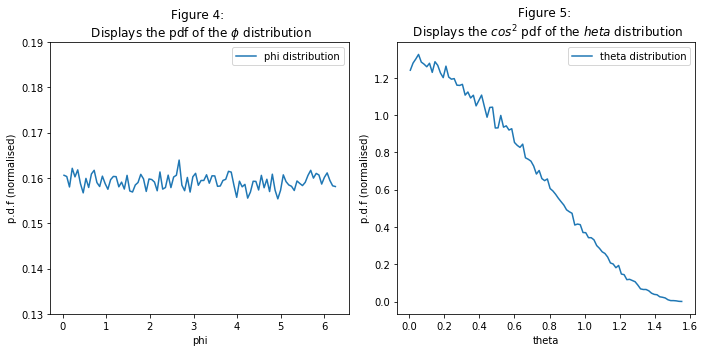

In [54]:

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111, projection='3d')
sim_ = Sim_plot(int(10))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Figure 1: \n Displays the scintillator experiment detecting muons\n\
          registered as green dots and producing electrons \n\
          registered as red crosses.' )
plt.show();

x_,y_,z_ = Electron_sim(1000)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_,y_,z_, c = 'b', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
ax.set_zticks([-2,-1,0,1,2])
plt.title('Figure 2: \n Displays the even distribution of electron \n\
          direction vectors' )
plt.show();

x_3 = [x(1000000)]
y_4 = [y(1000000)]
plt.figure(figsize=(10,6))
hist_3, bins = np.histogram(x_3, bins=100,normed = True)
hist_4, bins = np.histogram(y_4, bins=100,normed = True)
bin_centers = (bins[1:]+bins[:-1])*0.5
xone, = plt.plot(bin_centers, hist_3,label= 'x')
yone, = plt.plot(bin_centers, hist_4,label='y')
plt.legend(handles=[xone,yone],title="x,y distributions",bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Figure 3: \n Displays the pdf of the x & y distributions' )
plt.ylabel('p.d.f (normalised)')
plt.xlabel('x-y')
plt.ylim(4, 6)
plt.show()

phi_5 = [phi(1000000)]
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
hist_5, bins = np.histogram(phi_5, bins=100,normed = True)
bin_centers = (bins[1:]+bins[:-1])*0.5
phi_one, = plt.plot(bin_centers, hist_5,label= 'phi distribution')
plt.legend(handles=[phi_one])
plt.title('Figure 4: \n Displays the pdf of the $\phi$ distribution' )
plt.ylabel('p.d.f (normalised)')
plt.xlabel('phi')
plt.ylim(0.13, 0.19)

theta_6 = [theta(100000)]
plt.subplot(1, 2, 2)
hist_6, bins = np.histogram(theta_6, bins=100,normed = True)
bin_centers = (bins[1:]+bins[:-1])*0.5
theta_one, = plt.plot(bin_centers, hist_6,label= 'theta distribution')
plt.legend(handles=[theta_one])
plt.title('Figure 5: \n Displays the $cos^2$ pdf of the $\theta$ distribution' )
plt.ylabel('p.d.f (normalised)')
plt.xlabel('theta')
plt.tight_layout()
plt.show()



### c)
Below I use the simulation to estimate :
* The total rate of muons that pass through the detector.
* The fraction of those muons which are registered in 1, 2, 3 or 4 scintillator planes of the detector. 
* The fraction of those muons which decay and produce an electron that can be detected in an adjacent scintillator layer.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

T = 20 #The number of 10's time intervals the simulation is to be run
t = T*10    #The total run time of the simulation
Stats_ = Sim_stats(T)   #Calls the simulation
total_rate = Stats_['Events at 3']/t  #The rate at which muons make it through all four layers

frac_detect_0 = Stats_['Detections at 0']/Stats_['Events at 0']
frac_detect_1 = Stats_['Detections at 1']/Stats_['Events at 1']
frac_detect_2 = Stats_['Detections at 2']/Stats_['Events at 2']
frac_detect_3 = Stats_['Detections at 3']/Stats_['Events at 3']
frac_elecs = Stats_['Total elec detects']/Stats_['Total elecs produced']

print('Fraction detected in detector one = ',round(frac_detect_0,4))
print('Fraction detected in detector two = ',round(frac_detect_1,4))
print('Fraction detected in detector three = ',round(frac_detect_2,4))
print('Fraction detected in detector four = ',round(frac_detect_3,4))
print('Fraction of electrons which are detected = ',round(frac_elecs,4))
print('The rate at which muons make it through all four layers (s^-1) = ',round(total_rate,4))

Fraction detected in detector one =  0.5482
Fraction detected in detector two =  0.5959
Fraction detected in detector three =  0.8553
Fraction detected in detector four =  0.4854
Fraction of electrons which are detected =  0.4062
The rate at which muons make it through all four layers (s^-1) =  6.335


The fractions of muons detected in each of their respective detectors is taken as the ratio of the number of muons detected on that layer divided by the total number of muons which pass through that layer. In each case we clearly see conformity with the detection probabilities. This serves to successfully  validate the effectiveness of the programme in modelling detector efficiency. This is coded by creating an evenly distributed random number between zero and one and the then checking to see if that number lies above or below a given probability. 

The fraction of electrons which are detected, is taken as the number of electrons which escape a copper layer and then collide with an adjacent detector, divided by the total number of electrons produced. The ratios recoded lie in accordance with electrons of $50Mev$ and a max path length in copper of 1.8cm, given the geometry of the environment in which they are placed. Numbers much higher or lower than those recoded would require either the copper layers to be thinner and the scintillator levels to be closer together or the electron energies to be higher.

In order to determine the total rate of muons which pass through the detector, the overall normalisation from the intensity of _vertical_ muons 70 $m^{-2}s^{-1}sr^{-1}$ was integrated over the solid angle and area of the detector by:

$$ I = \int_{0}^{A} \int_{0}^{2\pi} \int_{0}^{\frac{\pi}{2}} 70cos^{2}\theta d\theta d\phi dA$$


To give the number of muons incident on the plane above the scintillator as $I = 13.6 s^{-1}$. The total rate of muons which pass through the detector is then taken as the number of those which make it through all four layers without popping out the side per unit time. This value, always being less than $I$, demonstrates the simulations effectiveness in modelling the boundaries of the detector plates.